### 3 (a) 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn import preprocessing
from sklearn.model_selection import KFold
from itertools import combinations

In [2]:
df = pd.read_excel('realestate.xlsx')
df.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.916667,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.916667,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583333,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500000,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833333,5.0,390.56840,5,24.97937,121.54245,43.1


In [3]:
df.columns

Index(['No', 'X1 transaction date', 'X2 house age',
       'X3 distance to the nearest MRT station',
       'X4 number of convenience stores', 'X5 latitude', 'X6 longitude',
       'Y house price of unit area'],
      dtype='object')

In [4]:
linear = LinearRegression()
col = list(df.columns)
col.remove('No')
df = df[col]
col.remove('Y house price of unit area')

In [5]:
X = df[col]
y = df['Y house price of unit area']

In [6]:
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state = 42)

In [7]:
linear.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [8]:
predicted = linear.predict(x_test)
print('The RMS Error is',np.sqrt(mean_squared_error(predicted,y_test)))

The RMS Error is 8.57703316536859


In [9]:
linear.coef_

array([ 5.85014746e+00, -2.42551464e-01, -5.13870668e-03,  1.07453372e+00,
        2.39100477e+02, -5.22365968e+01])

### 3 (b)

No. It is not correct to infer about the important of different features. This is because all the feature values have varying ranges, and hence the coefficients are chosen to overall normalise the effect of different range of values that different features take.

### 3 (c)

In [10]:
linear_scaled = LinearRegression()
x_train_scaled = preprocessing.scale(x_train)
x_test_scaled = preprocessing.scale(x_test)
linear_scaled.fit(x_train_scaled,y_train)
scaled_predicted = linear_scaled.predict(x_test_scaled)
print('The RMSE is',np.sqrt(mean_squared_error(scaled_predicted,y_test)))

The RMSE is 8.712564884272549


In [11]:
linear_scaled.coef_

array([ 1.65204522, -2.76099926, -6.40440182,  3.20557991,  2.989337  ,
       -0.78774024])

This above model that was fit, after the scaling shows us an entirely different picture. This is not a correct way to infer either, because of the simple fact that the coefficient doens't really capture any statistically important measure like variance or mean. The answer [here](https://stats.stackexchange.com/questions/202221/for-linear-classifiers-do-larger-coefficients-imply-more-important-features/202846) explains the same.

### 3 (d)

(array([ 1.,  0.,  2., 12., 32., 46., 21.,  7.,  2.,  2.]),
 array([-37.25837394, -30.62644422, -23.9945145 , -17.36258478,
        -10.73065506,  -4.09872534,   2.53320438,   9.1651341 ,
         15.79706382,  22.42899354,  29.06092326]),
 <a list of 10 Patch objects>)

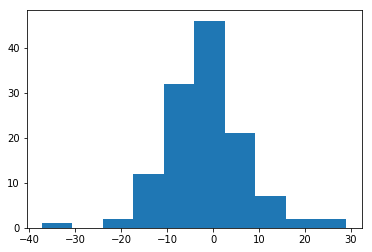

In [12]:
residual = y_test - scaled_predicted
plt.hist(residual)

As can be seen, the residuals actually form a normal distribution. This simply means that we have an unbiased predictor at hand, which is also the best as it reduces the variance the most.

### 3 (e) (i)

In [13]:
df = df.rename(index=str, columns = {'X1 transaction date':'X1','X2 house age':'X2',
       'X3 distance to the nearest MRT station':'X3',
       'X4 number of convenience stores':'X4', 'X5 latitude':'X5', 'X6 longitude':'X6'})
temp_columns = list(df.columns)
temp_columns.remove('Y house price of unit area')

In [14]:
kf = KFold(shuffle=True,n_splits=5)
kf_valid = KFold(shuffle=True,n_splits=4)

In [15]:
features = {}
for i in range(1,5):
    for i in combinations(temp_columns,i):
        new_arr =[]
        for i_ in range(len(i)):
            new_arr.append(i[i_][:2])
        if tuple(new_arr) not in features:
            features[tuple(new_arr)] = []
features_test = {}
for i in range(1,5):
    for i in combinations(temp_columns,i):
        new_arr =[]
        for i_ in range(len(i)):
            new_arr.append(i[i_][:2])
        if tuple(new_arr) not in features_test:
            features_test[tuple(new_arr)] = []
for train_index, test_index in kf.split(np.array(X)):
    val = 0
    X_train = df.iloc[train_index]
    y_train = y.iloc[train_index]
    X_test = df.iloc[test_index]
    y_test = y.iloc[test_index]
    X_train = X_train.reset_index(drop=True)
    X_test = X_test.reset_index(drop = True)
    y_train = y_train.reset_index(drop = True)
    y_test = y_test.reset_index(drop=True)
    for valid_train, valid_test in kf_valid.split(X_train):
        x_valid_train = X_train.iloc[valid_train]
        y_valid_train = y_train.iloc[valid_train]
        x_valid_test = X_train.iloc[valid_test]
        y_valid_test = y_train.iloc[valid_test]
        for i in range(1,5):
            for i in combinations(temp_columns,i):
                new_arr = []
                for i_ in range(len(i)):
                    new_arr.append(i[i_][:2])
                linear.fit(x_valid_train[new_arr],y_valid_train)
                predicted = linear.predict(x_valid_test[new_arr])
                features[tuple(new_arr)].append(np.sqrt(mean_squared_error(predicted,y_valid_test)))
    for i in range(1,5):
        for i in combinations(temp_columns,i):
            new_arr = []
            for i_ in range(len(i)):
                new_arr.append(i[i_][:2])
            linear.fit(X_train[new_arr],y_train)
            predicted = linear.predict(X_test[new_arr])
            features_test[tuple(new_arr)].append(np.sqrt(mean_squared_error(predicted,y_test)))

for i in features:
    print('Features chosen are ',i,' and the mean RMSE on validation is ' ,np.array(features[i]).mean())
print('The best features are X2-X3-X4-X5 with a mean RMSE on the validation test of ',8.954014174394077)
print('\n\n\n\n')
for i in features_test:
    print('Features chosen are ',i,' and the mean RMSE on the test set is ',np.array(features_test[i]).mean())
print('\n\n\n\n')
print('The best features chosen from validation is the best with a mean RMSE on the test set of ',8.893749069531648)

Features chosen are  ('X1',)  and the mean RMSE on validation is  13.553180533025406
Features chosen are  ('X2',)  and the mean RMSE on validation is  13.332293113355018
Features chosen are  ('X3',)  and the mean RMSE on validation is  9.923037450183578
Features chosen are  ('X4',)  and the mean RMSE on validation is  11.073385729147702
Features chosen are  ('X5',)  and the mean RMSE on validation is  11.37540620711045
Features chosen are  ('X6',)  and the mean RMSE on validation is  11.486046517429312
Features chosen are  ('X1', 'X2')  and the mean RMSE on validation is  13.320753131586297
Features chosen are  ('X1', 'X3')  and the mean RMSE on validation is  9.79334565633744
Features chosen are  ('X1', 'X4')  and the mean RMSE on validation is  11.041556791779238
Features chosen are  ('X1', 'X5')  and the mean RMSE on validation is  11.361058967454007
Features chosen are  ('X1', 'X6')  and the mean RMSE on validation is  11.41884079635604
Features chosen are  ('X2', 'X3')  and the me

### 3 (e) (ii)

In [16]:
feature_set= {0}
type(feature_set)

set

In [17]:
feature_total = {}
for train_index, test_index in kf.split(np.array(X)):
    val = 0
    X_train = df.iloc[train_index]
    y_train = y.iloc[train_index]
    X_test = df.iloc[test_index]
    y_test = y.iloc[test_index]
    feature_set = set()
    min_so_far = np.inf
    for i in range(6):
        temp = min_so_far
        for i in combinations(temp_columns,1):
            new_arr = list(feature_set)
            for i_ in range(len(i)):
                new_arr.append(i[i_][:2])
            linear.fit(X_train[new_arr],y_train)
            predicted = linear.predict(X_test[new_arr])
            if np.sqrt(mean_squared_error(predicted,y_test))<min_so_far:
                min_so_far = np.sqrt(mean_squared_error(predicted,y_test))
                feature_set = set(new_arr)
    feature_total[tuple(list(feature_set))]  = 1

In [18]:
for i in feature_total:
    new_arr = [j for j in i]

In [19]:
X = df[['X1','X2','X3','X4','X5','X6']]
y = df['Y house price of unit area']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3,random_state=42)

In [20]:
for i in feature_total:
    new_arr = [k for k in i]
    x_tr = X_train[new_arr]
    y_tr = y_train
    linear.fit(x_tr,y_tr)
    predicted = linear.predict(X_test[new_arr])
    print('The subset of features',new_arr,' has a RMSE score of ',np.sqrt(mean_squared_error(predicted,y_test)))
linear.fit(X_train,y_train)
predicted = linear.predict(X_test)
print('The RMSE with all the features is', np.sqrt(mean_squared_error(predicted,y_test)))

The subset of features ['X2', 'X4', 'X5', 'X3', 'X1']  has a RMSE score of  8.526459552115577
The subset of features ['X2', 'X3', 'X1', 'X4']  has a RMSE score of  8.641848321401971
The subset of features ['X5', 'X3', 'X4', 'X1']  has a RMSE score of  9.278633282990386
The RMSE with all the features is 8.57703316536859


As we can see, the subset consisting of X1, X2, X3, X4 and X5 has the best performance